In [ ]:
library(pheatmap)
library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library( RColorBrewer )
library(karyoploteR)
library(bedtoolsr)
library("bedr");
library(DT)

### load the data

In [2]:
high <- read.table('data_high.freq.txt',header=F)

In [3]:
low <- read.table('data_low.freq.txt',header=F)

In [4]:
neg <- read.table('data_neg.freq.txt',header=F)

### merge all them together

In [5]:
all_data <- cbind(high,low$V4,neg$V4)

In [6]:
colnames(all_data) <- c("chr","start","end","high","low","neg")

In [7]:
all_data[!all_data$chr %in% c("chrX","chrY","chrM"),] -> all_data2

In [8]:
samp_number <- matrix(data = c(42,45,26),nrow = 3)

### add total sample number

In [9]:
all_data2$high_total <- 42
all_data2$low_total <- 45
all_data2$neg_total <- 26

### calculate the frequncy 

In [10]:
all_data2$high_freq <- all_data2$high/42
all_data2$low_freq <- all_data2$low/45
all_data2$neg_freq <- all_data2$neg/26

### calculate the p-value

In [11]:
rlt <- as.data.frame(matrix(data=NA,nrow = nrow(all_data2)))
colnames(rlt) <- "Pvalue"
for(i in 1:nrow(all_data2)){
    cbind(all_data2[i,4:6] %>% t(),samp_number - all_data2[i,4:6] %>% t()  ) -> a
    fisher.test(a) ->b
    b$p.value -> rlt[i,1]
}


In [12]:
cbind(all_data2,rlt) -> all_data3

In [ ]:
openxlsx::write.xlsx(x=all_data3_sig,rowNames = FALSE,file = "CNV_1M_bin_test_significant.xlsx")

In [13]:
all_data3 %>% filter(Pvalue<0.05) -> all_data3_sig

In [ ]:
all_data3_sig %>% filter(high_freq>low_freq)

In [26]:
length(which(all_data3_sig$low_freq > all_data3_sig$high_freq & all_data3_sig$low_freq > all_data3_sig$neg_freq))


[1] 0

In [61]:
t(all_data3[,c('high_freq','low_freq','neg_freq')]) -> freq2

In [62]:
freq2

,1,2,3,4,5,6,7,8,9,10,⋯,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887
high_freq,0.07142857,0.11904762,0.04761905,0.07142857,0.07142857,0.07142857,0.09523810,0.07142857,0.07142857,0.07142857,⋯,0.04761905,0.04761905,0.04761905,0.04761905,0.07142857,0.0952381,0.07142857,0.07142857,0.07142857,0.07142857
low_freq,0.00000000,0.04444444,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.02222222,0.02222222,0.02222222
neg_freq,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.03846154,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000


In [63]:
options(repr.plot.height=3,repr.plot.width=15)
col_fun = colorRamp2(c(min(freq2),max(freq2)/2, max(freq2)), c("#4575b4","#ffffbf","#d73027"))
column_ha = HeatmapAnnotation(group = all_data2$chr)
p4 = Heatmap(freq2, cluster_rows = FALSE,show_row_names = T,show_column_names = F,  top_annotation  = column_ha,
        cluster_columns = FALSE, border = "white",col = col_fun)

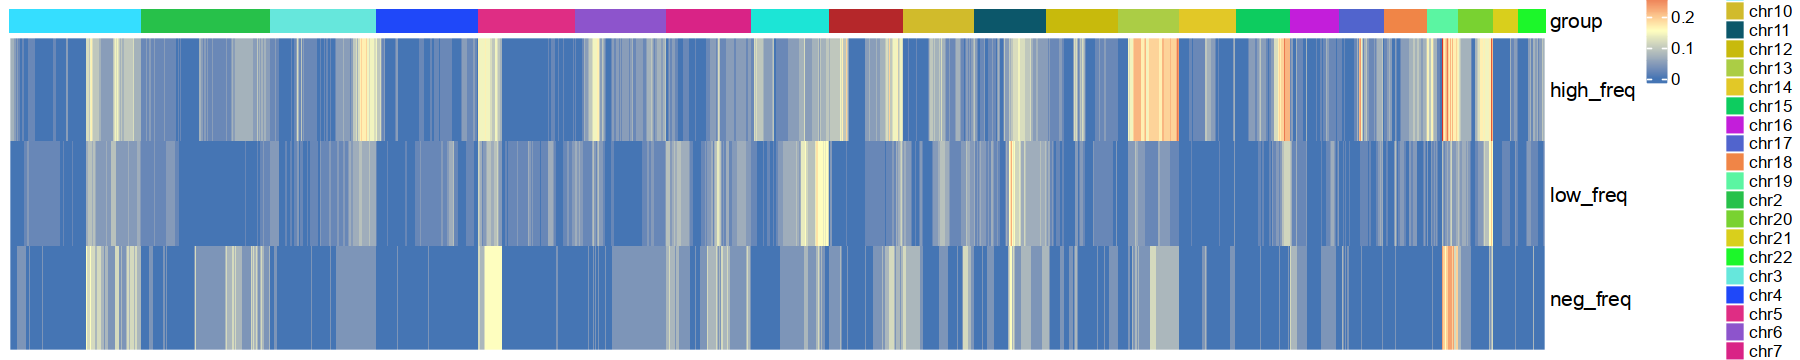

In [64]:
p4

In [46]:
pdf(file ="CNV.freq.all.pdf",width = 10,height = 2 )
p4
dev.off()

png 
  2

### assign the non-significant with 0

In [65]:
all_data3[all_data3$Pvalue >0.05,c('high_freq','low_freq','neg_freq')] =0

In [66]:
t(all_data3[,c('high_freq','low_freq','neg_freq')]) -> freq2

In [67]:
options(repr.plot.height=3,repr.plot.width=15)
col_fun = colorRamp2(c(min(freq2),max(freq2)/2, max(freq2)), c("#4575b4","#ffffbf","#d73027"))
column_ha = HeatmapAnnotation(group = all_data2$chr)
p1 = Heatmap(freq2, cluster_rows = FALSE,show_row_names = T,show_column_names = F,  top_annotation  = column_ha,
        cluster_columns = FALSE, border = "white",col = col_fun)

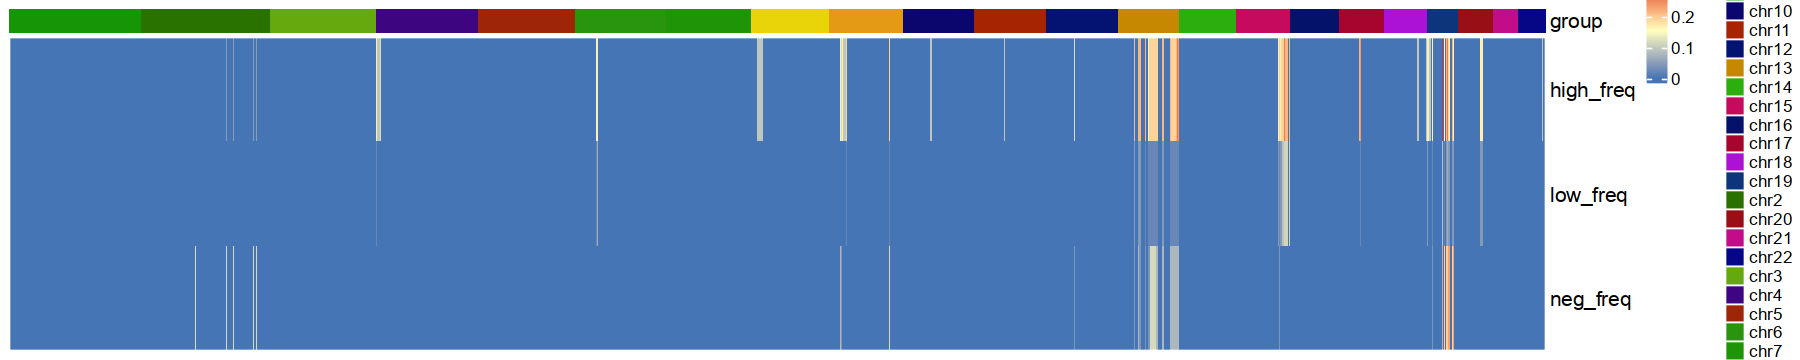

In [68]:
p1

In [26]:
pdf(file ="CNV.freq.significant.pdf",width = 10,height = 2 )
p1
dev.off()

png 
  2

### load all protein coding gene

In [69]:
pro_cod <- read.table('/disk1/pengweixing/database/hg38/hg38.v29.procod.gene.pos2',header=F)

In [70]:
colnames(pro_cod) <- c("chr","start","end","gene")

In [71]:
makeGRangesFromDataFrame(pro_cod,keep.extra.columns = TRUE) -> pro_cod2

In [72]:
head(all_data3_sig)

,chr,start,end,high,low,neg,high_total,low_total,neg_total,high_freq,low_freq,neg_freq,Pvalue
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr2,102000001,103000001,0,0,3,42,45,26,0.00000000,0,0.1153846,0.01110466
2,chr2,160000001,161000001,2,0,3,42,45,26,0.04761905,0,0.1153846,0.04044795
3,chr2,170000001,171000001,2,0,3,42,45,26,0.04761905,0,0.1153846,0.04044795
4,chr2,173000001,174000001,2,0,3,42,45,26,0.04761905,0,0.1153846,0.04044795
5,chr2,174000001,175000001,2,0,3,42,45,26,0.04761905,0,0.1153846,0.04044795
6,chr2,208000001,209000001,3,0,4,42,45,26,0.07142857,0,0.1538462,0.01675661


In [73]:
sig_range <- makeGRangesFromDataFrame(all_data3_sig[,1:3])

In [74]:
sig_range[1]

GRanges object with 1 range and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]     chr2 102000001-103000001      *
  -------
  seqinfo: 15 sequences from an unspecified genome; no seqlengths

In [75]:
cancergene <- read.table('/disk1/pengweixing/database/cancergene/merge.cancer.gene2',header=F)

In [76]:
cancergene <- cancergene$V1

In [77]:
all_data3_sig$cancergenes <- NA

### assign cancer gene

In [ ]:
for(i in 1:length(sig_range)){
   intersect <- bedtoolsr::bt.intersect(pro_cod, sig_range[i])
   genes <- intersect$V4
   genes2 <- intersect(genes,cancergene) 
  
    if(length(genes2)>1){
       gene_string <- paste(genes2,collapse=',')
    }else if(length(genes2)==1){
        gene_string <- genes2
    }else{
        gene_string = ""
    }
   # print(gene_string)
    all_data3_sig$cancergenes[i] <- gene_string
    
}

In [37]:
all_data3_sig %>% head()

,chr,start,end,high,low,neg,high_total,low_total,neg_total,high_freq,low_freq,neg_freq,Pvalue,cancergenes
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr10,52000001,53000001,4,0,0,42,45,26,0.0952381,0,0.00000000,0.03666556,
2,chr10,53000001,54000001,4,0,0,42,45,26,0.0952381,0,0.00000000,0.03666556,
3,chr10,54000001,55000001,4,0,0,42,45,26,0.0952381,0,0.00000000,0.03666556,
4,chr11,57000001,58000001,4,0,0,42,45,26,0.0952381,0,0.00000000,0.03666556,"CLP1,CTNND1"
5,chr12,52000001,53000001,4,0,0,42,45,26,0.0952381,0,0.00000000,0.03666556,
6,chr12,53000001,54000001,5,0,1,42,45,26,0.1190476,0,0.03846154,0.02736278,"HOXC13,HOXC11"


In [38]:
openxlsx::write.xlsx(x=all_data3_sig,rowNames = FALSE,file = "CNV_1M_bin_test_significant.xlsx")